In [28]:
import pandas as pd
import numpy as np
import pickle

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from xgboost import XGBClassifier
import matplotlib.pyplot as plt
import seaborn as sns

In [29]:
# Load Dataset
df = pd.read_csv('cropbynpk.csv')
df.head()

,N,P,K,Temperature,Humidity,Ph,Rain,Crop
0,76,39,24,24.254745,55.647099,6.995844,64.238455,maize
1,77,52,17,24.863749,65.742005,5.714800,75.822705,maize
2,74,39,23,22.626511,65.774729,6.780736,88.172510,maize
3,81,49,20,18.041855,60.614943,5.513698,104.232162,maize
4,63,42,21,23.262376,72.331255,5.798424,67.102251,maize


In [30]:
# Define Features and Target
feature_columns = ['N', 'P', 'K', 'Temperature', 'Humidity', 'Ph', 'Rain']
label_column = 'Crop'

In [31]:
# Split into Train and Test
X = df[feature_columns]
y = df[label_column]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [32]:
# Preprocessing: Scaling and Label Encoding
scaler = StandardScaler()
le = LabelEncoder()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

y_train_encoded = le.fit_transform(y_train)
y_test_encoded = le.transform(y_test)

In [33]:
# Train XGBoost Classifier
model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
model.fit(X_train_scaled, y_train_encoded)


C:\Users\Nejarul\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\training.py:183: UserWarning: [16:07:45] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, ...)

In [34]:
y_pred_encoded = model.predict(X_test_scaled)
y_pred_labels = le.inverse_transform(y_pred_encoded)

In [35]:
# Evaluation Metrics
acc = accuracy_score(y_test, y_pred_labels)
print(f"Accuracy: {acc:.4f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred_labels))

cm = confusion_matrix(y_test, y_pred_labels)

Accuracy: 0.9959

Classification Report:
              precision    recall  f1-score   support

       apple       0.95      1.00      0.98        20
      banana       1.00      1.00      1.00        20
   blackgram       1.00      1.00      1.00        20
    chickpea       1.00      1.00      1.00        40
     coconut       1.00      1.00      1.00        20
      coffee       1.00      1.00      1.00        20
      cotton       1.00      1.00      1.00        20
      grapes       1.00      0.95      0.97        20
        jute       1.00      0.95      0.97        20
 kidneybeans       1.00      1.00      1.00        38
      lentil       1.00      1.00      1.00        20
       maize       1.00      1.00      1.00        25
       mango       1.00      1.00      1.00        20
   mothbeans       1.00      1.00      1.00        20
    mungbean       1.00      1.00      1.00        20
   muskmelon       1.00      1.00      1.00        20
      orange       1.00      1.00      1

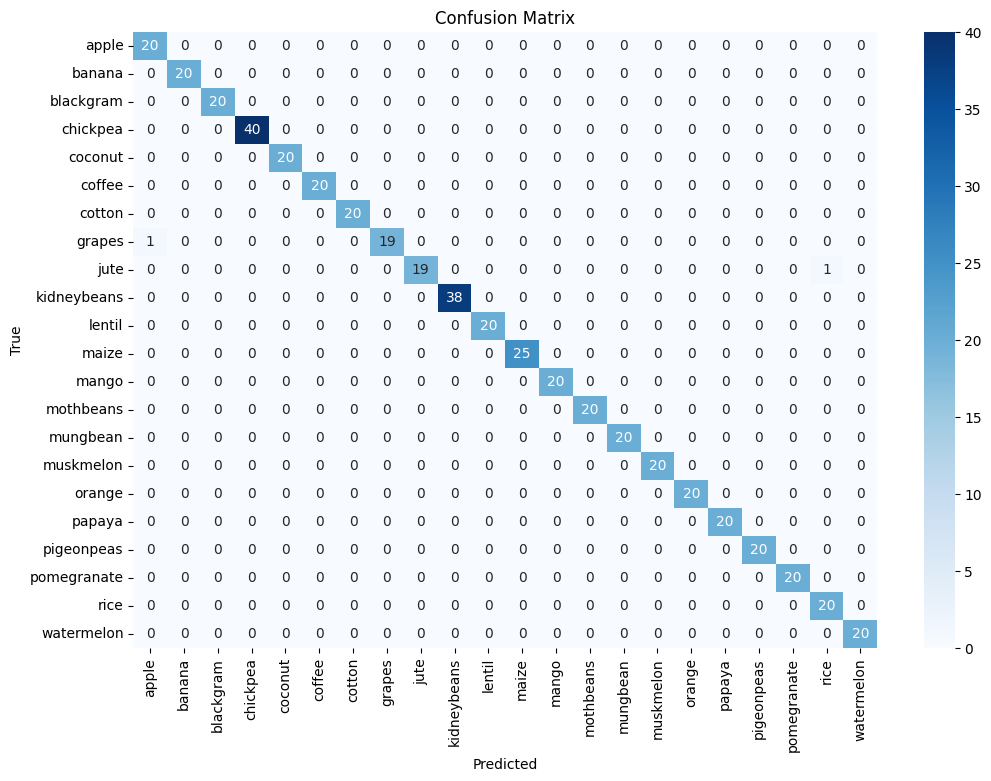

In [36]:
plt.figure(figsize=(12, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=le.classes_,
            yticklabels=le.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [37]:
# Save Full Pipeline (Model + Scaler + Label Encoder)
model_pipeline = {
    'model': model,
    'scaler': scaler,
    'label_encoder': le,
    'feature_columns': feature_columns
}

with open(r'crop_recommendation_model.pkl', 'wb') as f:
    pickle.dump(model_pipeline, f)

print("\u2705 Full model pipeline saved!")

✅ Full model pipeline saved!


In [38]:
new_sample = [90, 42, 43, 20.87, 82.00, 6.5, 200.0]  # Example input
new_sample_df = pd.DataFrame([new_sample], columns=feature_columns)
new_sample_scaled = scaler.transform(new_sample_df)

# Predict probabilities
pred_proba = model.predict_proba(new_sample_scaled)

# Recommend Top 5 Crops
top_5_indices = np.argsort(pred_proba[0])[::-1][:5]
top_5_crops = label_encoder.inverse_transform(top_5_indices)

print("Top 5 Recommended Crops:")
for i, crop in enumerate(top_5_crops, 1):
    print(f"{i}. {crop}")

Top 5 Recommended Crops:
1. rice
2. jute
3. coffee
4. banana
5. muskmelon
